### ✨ 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [19]:
# 데이터 가져오기
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
# data, target
data = load_diabetes()
df_x =df_dataframe["data"]
df_y = df_dataframe["target"]
print("data", df_x.shape)
print("target", df_y.shape)

data (442, 10)
target (442,)


In [21]:
# numpy array로 변환하기 
df_x = df_x.values
df_y = df_y.values
print(type(df_x),type(df_y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [23]:
# train과 test data로 분리하기
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_x, df_y,test_size = 0.2, random_state = 42 )

In [24]:
# 가중치와 bias 준비
w = np.random.randn(10)
b = np.random.randn()
print("w", w)
print(b)

# 모델함수  구현하기
def model(X, W, b):
    predictions =np.dot(W,X.T) + b
    return predictions

w [-0.50418206  0.92730763  0.30075144  0.31464595  0.17840322 -2.80074419
 -2.00573911 -0.88308289 -0.45081713  0.45850396]
0.5940554939613902


In [25]:
# mse 함수
def mse(y, prediction):
    mse = ((y - prediction)**2).mean()
    return mse

# loss 함수
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = mse(predictions, y)
    return L

In [14]:
# gradient함수 구현 - 기울기 계산
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
dW, db = gradient(x_train, w, b, y_train)
print("dW:", dW)
print("db:", db)

dW: [-1.85120837 -0.11603199 -4.97377808 -3.70924907 -1.30128109 -0.89290674
  3.12067295 -3.27503901 -4.47522742 -3.51780363]
db: -306.74751145179926


In [26]:
 #learning rate
lr = 0.1

In [27]:
# 모델 학습하기
losses = []

for i in range(1, 6001):
    dW, db = gradient(x_train, w, b, y_train)
    w -= lr * dW
    b -= lr * db
    L = loss(x_train, w, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3442.0690
Iteration 2000 : Loss 3093.7159
Iteration 3000 : Loss 2979.0144
Iteration 4000 : Loss 2933.8327
Iteration 5000 : Loss 2914.8221
Iteration 6000 : Loss 2906.3053


In [28]:
# test data에 대한 성능 확인하기
prediction = model(x_test, w, b)
mse = loss(x_test, w, b, y_test)
mse

2870.4693623192065

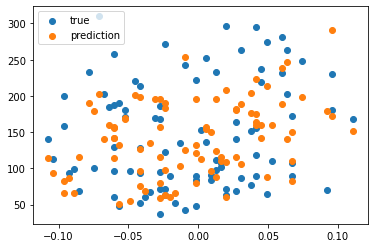

In [29]:
# 정답 데이터와 예측한 데이터 시각화
plt.scatter(x=x_test[:, 0], y=y_test)
plt.scatter(x=x_test[:, 0], y=prediction)
plt.legend(["true","prediction"])
plt.show()

### 개요
- 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

### 회고
- mse, loss, gradient 등 인공지능에 관련된 주요 함수들을 구현해 볼 수 있는 좋은 과정이 되었다.
- 하이퍼파라미터 중 learning rate를 주로 변경하면서 모델의 loss 값을 비교해보았는데, 확실히 learning rate가 step size 역할을 해서 그런지 커질 수록 크게 크게 loss 값이 감소하였다.
- 다른 조건은 동일하고 learning rate가 0.01인 경우에는 epochs 값이 10000이 상인 경우에 3000이하로 떨어지는데 0.1인 경우에는 6000번만 돌려도 빨리 수렴했다.
- 하지만 추후에 설정해야 할 하이퍼파라미터가 많아지는 경우에는 learning rate를 설정하는데 다른 고려할 부분이 있는지도 살펴볼 예정이다.